<a href="https://colab.research.google.com/github/clementsiegrist/reco_formes/blob/main/Fuzzy_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyfuzzylite scikit-fuzzy numpy pandas matplotlib opencv-python pillow fuzzy-c-means

     |████████████████████████████████| 174kB 5.9MB/s 
     |████████████████████████████████| 1.0MB 39.7MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=7b56df4de571b278c1939e26428a08d9a60b9c8f17ae85b24b6d752dafa2f2d7
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [2]:
!git clone https://github.com/clementsiegrist/reco_formes.git

Cloning into 'reco_formes'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 97 (delta 38), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (97/97), done.


**Import necessary libraries**

In [3]:
from reco_formes import anfis 
import fuzzylite as fl
import skfuzzy as fuzz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

# **I. Brief visualization of some fuzzy membership functions**

Introducing scikit-fuzzy library and visualize a simple Fuzzy OR rule based on two triangular membership functions.

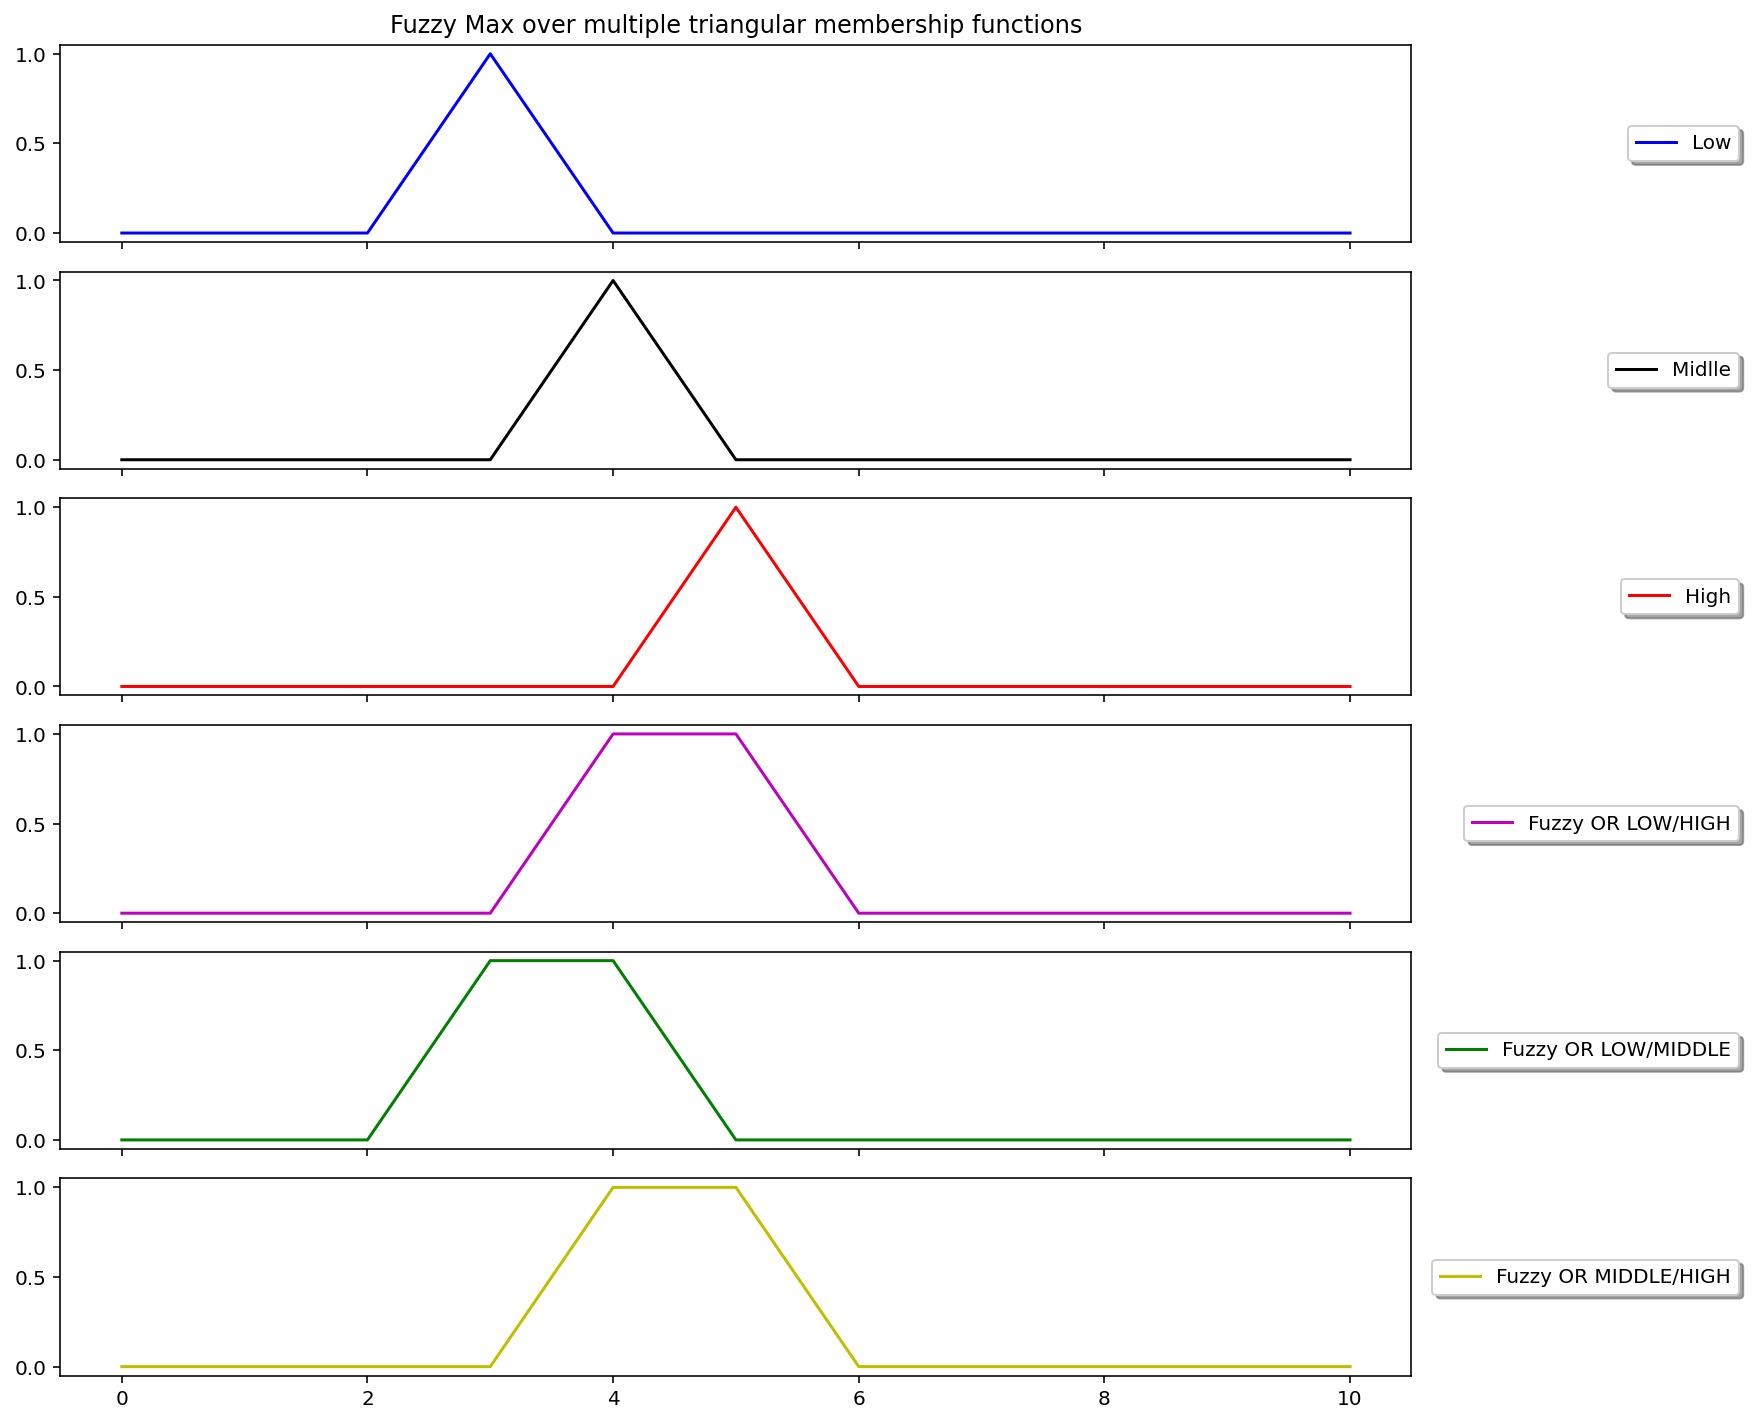

In [4]:
# Defining numpy array
x_qual = np.arange(0, 11, 1)

# Defining the numpy array for Traingular membership functions
qual_lo = fuzz.trimf(x_qual, [2, 3, 4])
qual_md = fuzz.trimf(x_qual, [3, 4, 5])
qual_hi = fuzz.trimf(x_qual, [4, 5, 6])

# Create a Fuzzy OR rule for each combination of the previous membership functions
max = fuzz.fuzzy_or(x_qual, qual_lo, x_qual, qual_hi)
max1 = fuzz.fuzzy_or(x_qual, qual_lo, x_qual, qual_md)
max2 = max = fuzz.fuzzy_or(x_qual, qual_md, x_qual, qual_hi)

# Plot the results
fig, ax = plt.subplots(6, 1, figsize=(10,10), sharex=True, sharey=True)
ax[0].plot(x_qual, qual_lo, 'b', label='Low')
ax[1].plot(x_qual, qual_md, 'k', label='Midlle')
ax[2].plot(x_qual, qual_hi, 'r', label='High')
ax[3].plot(max[0], max[1], 'm', label='Fuzzy OR LOW/HIGH')
ax[4].plot(max1[0], max1[1], 'g', label='Fuzzy OR LOW/MIDDLE')
ax[5].plot(max2[0], max2[1], 'y', label='Fuzzy OR MIDDLE/HIGH')
ax[0].set_title('Fuzzy Max over multiple triangular membership functions')
plt.tight_layout()
ax[0].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[1].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[2].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[3].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[4].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
ax[5].legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fancybox=True, shadow=True)
fig.show()

# **II. Fuzzy-Cmeans**


**II. A Fuzzy-Cmeans on a greyscale image**



In [5]:
import os
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from reco_formes.clustering import cmeans
import matplotlib as mlp

The function fuzzy_cmeansgrey() calls the function cmeans from reco_formes/clustering and return the centers coordinate as well as the membership function, based on which we plot our results.

In [6]:
def change_color_fuzzycmeans(cluster_membership, clusters):

    img = []
    for pix in cluster_membership.T:
        img.append(clusters[np.argmax(pix)])
    return img


def read_image(path):

    folder = path
    list_images = os.listdir(folder)
    list_img = []
    for i in list_images:
        img = cv2.imread(os.path.join(folder, i))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        rgb_img = img.reshape((img.shape[0] * img.shape[1], 1))
        list_img.append(rgb_img)

    return list_img, img.shape

def fuzzy_cmeansgrey(path, n_clusters):
    
    # Iterates over each image
    list_img, shape = read_image(path)
    n_data = len(list_img)
    clusters = n_clusters
    for index, rgb_img in enumerate(list_img):

        # Iterates over each number of clusters
        for i, num_cluster in enumerate(clusters):
            print('-----------------------------------------------------------')
            print('         Image ' + str(i + 1) + '          Nb Clusters :' +' '+ str(num_cluster))
            centers, u_fonc, u_fonc0, distance, hist, num_iter, fuzzy_part_coeff = cmeans(
                rgb_img.T, num_cluster, 2, error=0.05, maxiter=10000, init=None, seed=42)

            new_img = change_color_fuzzycmeans(u_fonc, centers)
            new_img = np.reshape(new_img, shape).astype(np.uint8)
            
            # Create plot
            fig, axs = plt.subplots(1, 2, figsize=(5, 5))
            axs[0].imshow(np.reshape(rgb_img, shape), cmap='gray')
            axs[1].imshow(new_img, cmap='gray')
            plt.tight_layout()
            plt.show()



-----------------------------------------------------------
         Image 1          Nb Clusters : 2


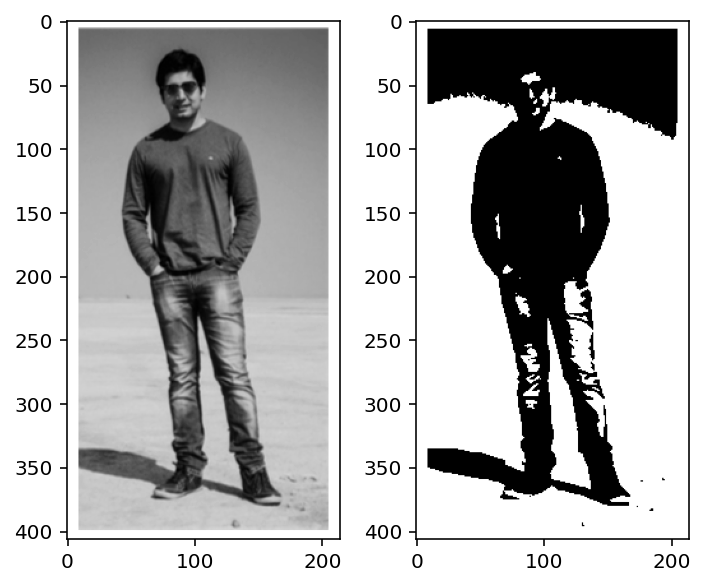

-----------------------------------------------------------
         Image 2          Nb Clusters : 4


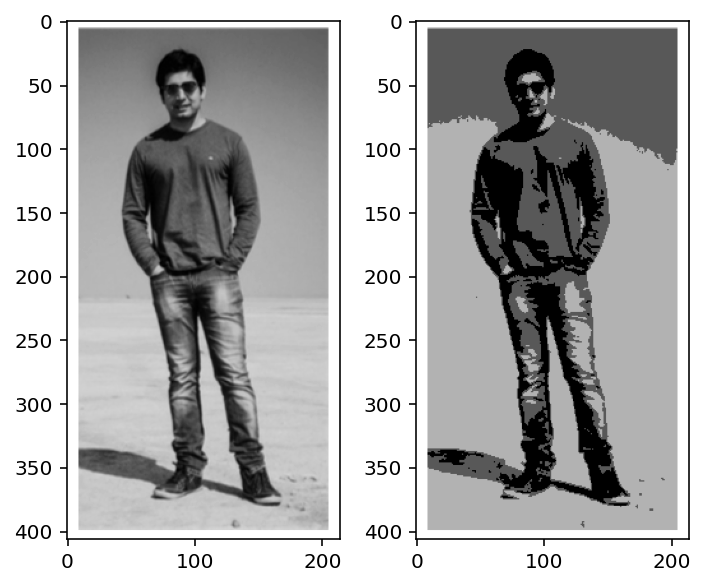

-----------------------------------------------------------
         Image 3          Nb Clusters : 6


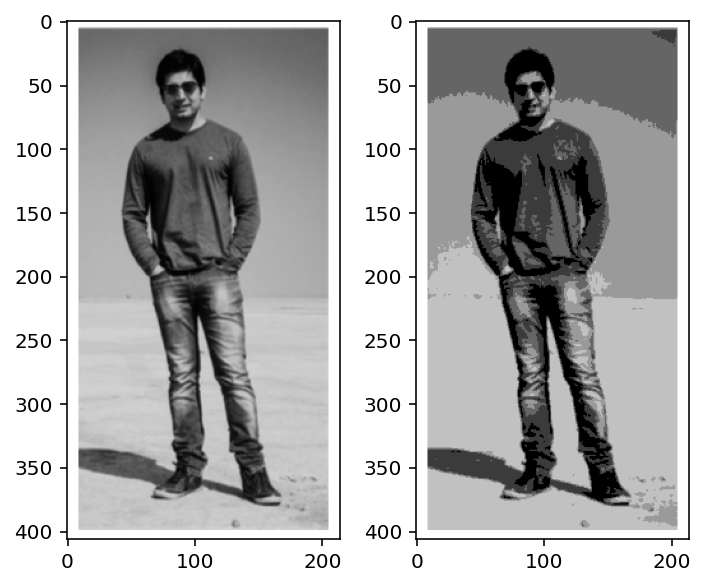

-----------------------------------------------------------
         Image 4          Nb Clusters : 8


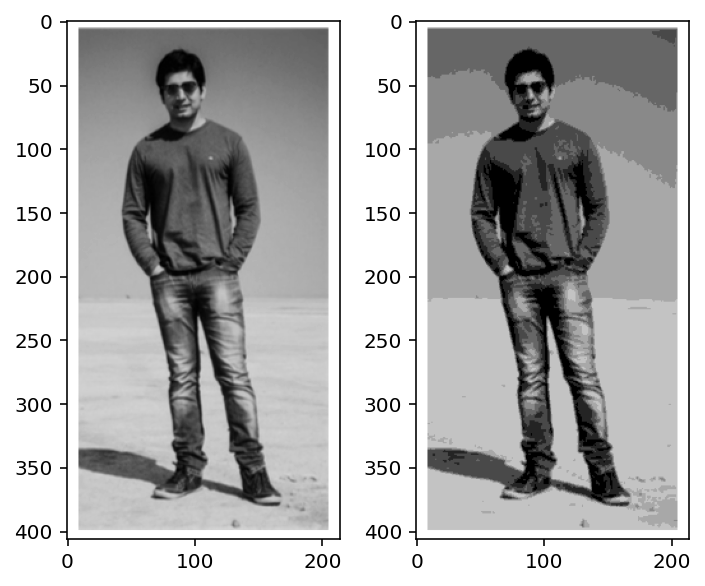

-----------------------------------------------------------
         Image 5          Nb Clusters : 10


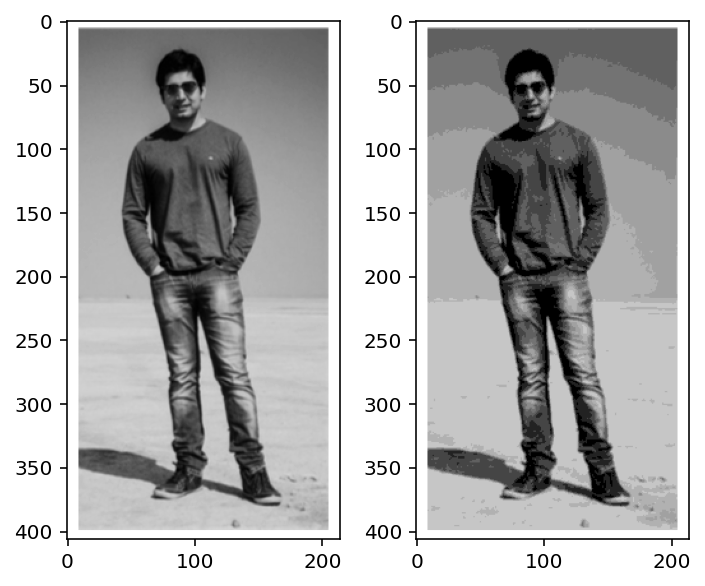

-----------------------------------------------------------
         Image 6          Nb Clusters : 12


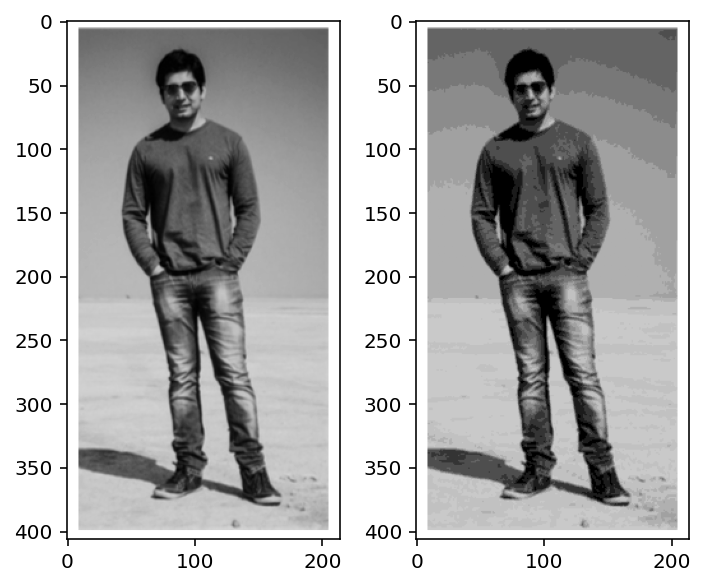

In [7]:
fuzzy_cmeansgrey('/content/reco_formes/shape_dir', [2, 4, 6, 8, 10, 12])

**II. B Fuzzy-Cmeans on a RGB image**

The function fuzzy_cmeansRGB() calls the function cmeans from reco_formes/clustering and return the centers coordinate as well as the membership function, based on which we plot our results.

In [8]:
def readimage_3D(path):

    folder = path
    list_images = os.listdir(folder)
    print(list_images)
    list_img = []
    for i in list_images:
        img = cv2.imread(os.path.join(folder, i))
        rgb_img = img.reshape((img.shape[0] * img.shape[1], 3))
        list_img.append(rgb_img)

    return list_img, img.shape

def fuzzy_cmeansRGB(path, n_clusters):

    list_img, shape = readimage_3D(path)
    n_data = len(list_img)
    num_clusters = n_clusters

    # Iterates over previously loaded images
    for index, rgb_img in enumerate(list_img):
        img = np.reshape(rgb_img, shape).astype(np.uint8)

        # Iterate over each cluster
        for i, num_clusters in enumerate(num_clusters):
            print('-----------------------------------------------------------')
            print('         Image ' + str(index + 1) + '          Nb Clusters :' +' '+ str(num_clusters))
            centers, u_fonc, u_fonc0, distance, hist, num_iter, fuzzy_part_coeff = cmeans(
                rgb_img.T, num_clusters, 2, error=0.05, maxiter=10000, init=None, seed=42)

            # Change each pixel color according
            new_img = change_color_fuzzycmeans(u_fonc, centers)
            new_img = np.reshape(new_img,shape).astype(np.uint8)

            # Create plot
            fig, axs = plt.subplots(1, 2, figsize=(5, 5))
            axs[0].imshow(np.reshape(rgb_img, shape))
            axs[1].imshow(new_img, cmap='gray')
            plt.tight_layout()
            plt.show()

['Capture d’écran 2020-10-31 à 21.18.49.png']
-----------------------------------------------------------
         Image 1          Nb Clusters : 2


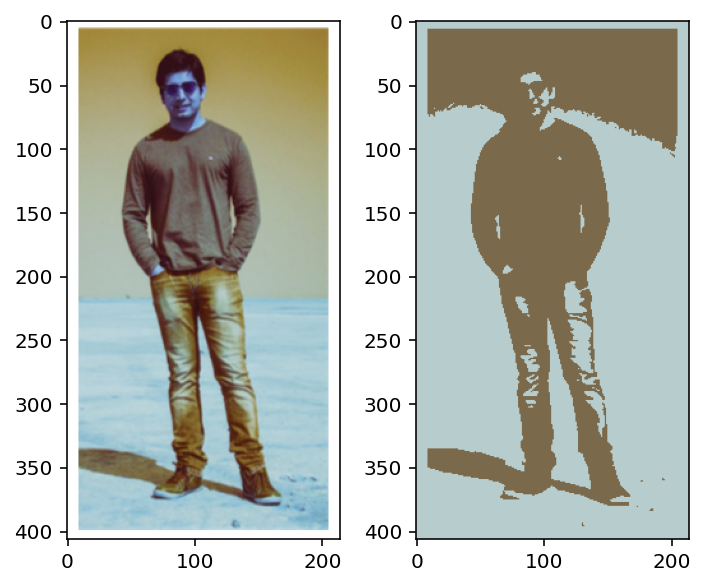

-----------------------------------------------------------
         Image 1          Nb Clusters : 4


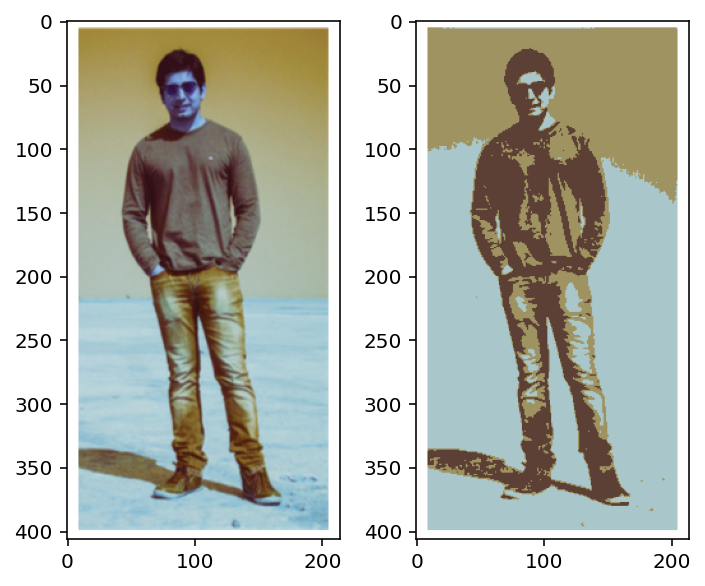

-----------------------------------------------------------
         Image 1          Nb Clusters : 6


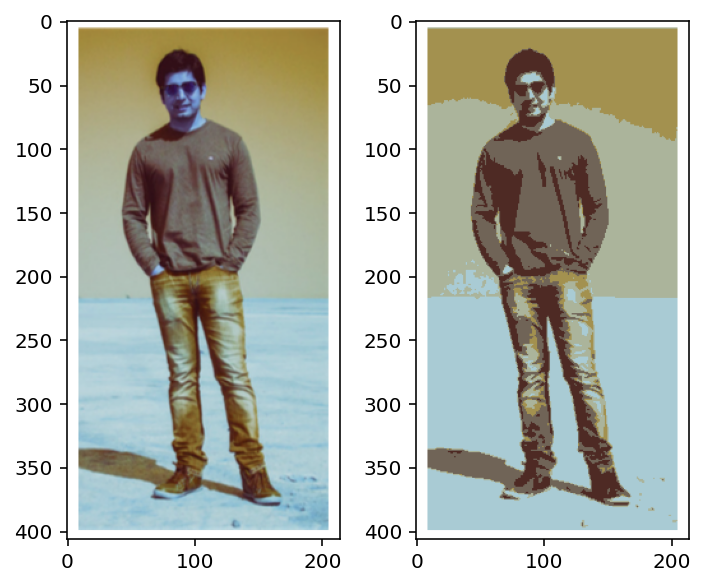

-----------------------------------------------------------
         Image 1          Nb Clusters : 8


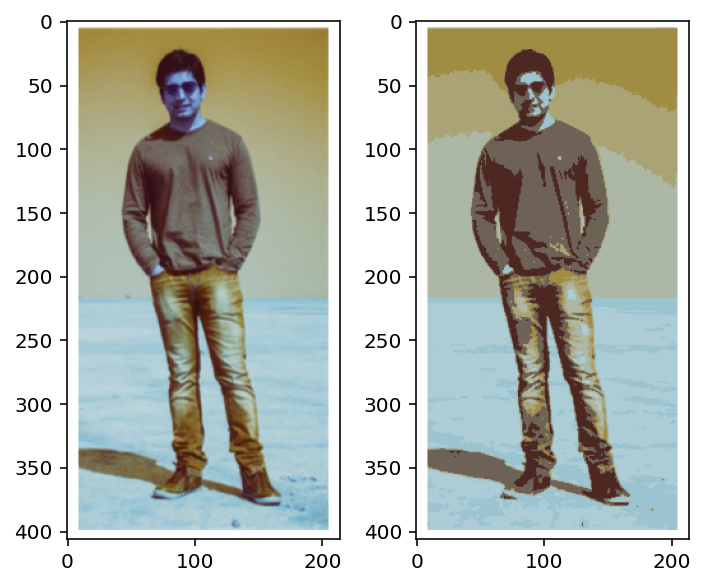

-----------------------------------------------------------
         Image 1          Nb Clusters : 10


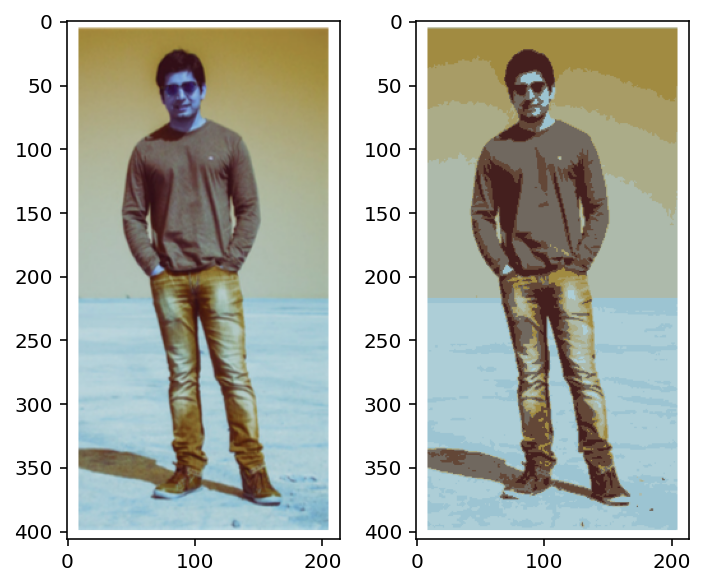

-----------------------------------------------------------
         Image 1          Nb Clusters : 12


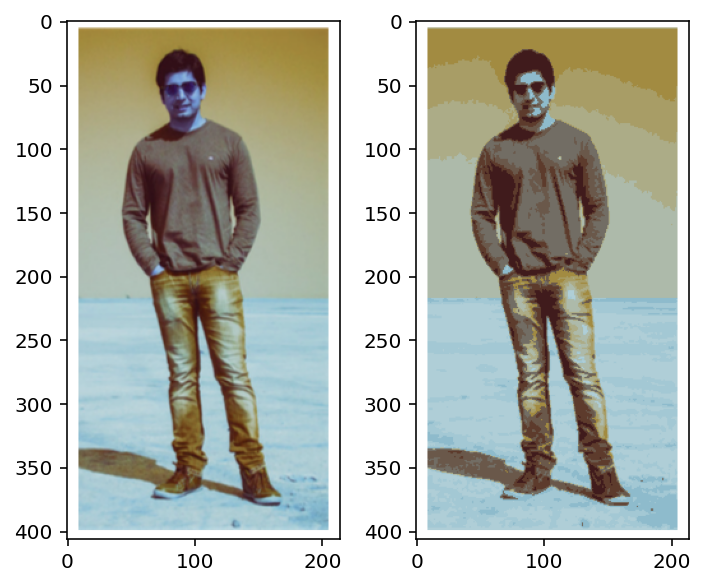

In [9]:
fuzzy_cmeansRGB('/content/reco_formes/shape_dir', [2, 4, 6, 8, 10, 12])

**II. C Fuzzy-CMeans with fcmeans library**

Implement the Fuzzy CMeans with 10 clusters algorithm proposed in [1] and see the results and compare it to the previous results of the 10 clusters Fuzzy CMeans.

[1] M. C. Nwadiugwu (2020) Gene-Based Clustering Algorithms: Comparison Between Denclue, Fuzzy-C, and BIRCH, Bioformatics and Biology Insights, Sage Journals.
https://github.com/omadson/fuzzy-c-means/blob/master/examples/01%20-%20Colour%20quantization.ipynb 

In [10]:
import numpy as np
from PIL import Image
from fcmeans import FCM

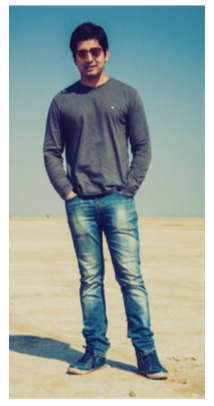

In [11]:
# Getting and rescaling the image
image = Image.open('/content/reco_formes/shape_dir/Capture d’écran 2020-10-31 à 21.18.49.png')          # read image (oarsman at https://omadson.github.io/photos/)
N, M = image.size                                  # get the number of columns (N) and rows (M)
image   

In [12]:
# Transforming image into a data set
X = np.asarray(image).reshape(N*M, 4) 
print(X.shape)                                                     

# Instantiate and fite the model
fcm = FCM(n_clusters=10)                           
fcm.fit(X)  

# Make prediction and get the label
labeld_X = fcm.predict(X)                         
transformed_X = fcm.centers[labeld_X]

# Convert to 8 byte intergers and reshape
quatized_array = (transformed_X.astype('uint8').reshape((M, N, 4)))

quatized_image = Image.fromarray(np.asarray(quatized_array)) 

(86884, 4)


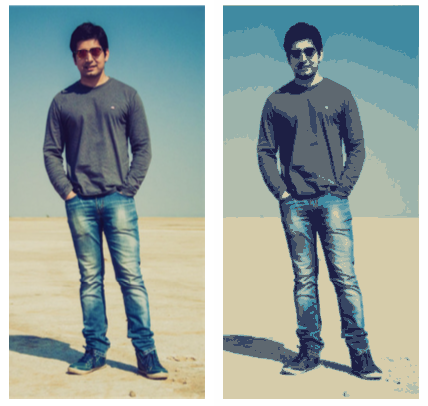

In [13]:
side_by_side = Image.fromarray(np.hstack(
    [np.array(image),np.array(quatized_image)]))
side_by_side

Not Bad at all ! The Sky background appears more nuanced than with the previous algorithm, however, the ground details colors shades and nuanced are better represented with the previous algorithm.

# **III. ANFIS : Adaptative Neuro-Fuzzy Inference Systems**


Create an ANFIS networks as proposed by J.-S. R. Jang [2] with the modified anfis library and applied it in order to predict a sort of sync function convolved/multipled with a non-uniform triangular function. 

In the the original publication [2] the first use case of ANFIS is on a two dimensional sync function rather than a one dimensionnal as we do in this work.

[2] J.-S. and R. Jang (1993) ANFIS: Adaptative Neuro-Fuzzy Inference Systems, IEEE Transactions on Systems, Man, and Cybernetics Vol. 23, No. 3, May/June 1993.

current error:  0.32197133130238204
current error:  0.32064969677854194
current error:  0.31935983596568546
current error:  0.3180964819660658
current error:  0.3167312506083373
current error:  0.31525469705445675
current error:  0.3136564810257317
current error:  0.3119254351798252
current error:  0.3100497693043361
current error:  0.30801749864592604
current error:  0.30581722267254424
current error:  0.30343942051211725
current error:  0.3008784504791307
current error:  0.29813538447434346
current error:  0.2952214986702995
current error:  0.29216105234657724
current error:  0.2889868451562046
current error:  0.2856912569138403
current error:  0.28184647973294136
0.144028
0.017168
-0.001662


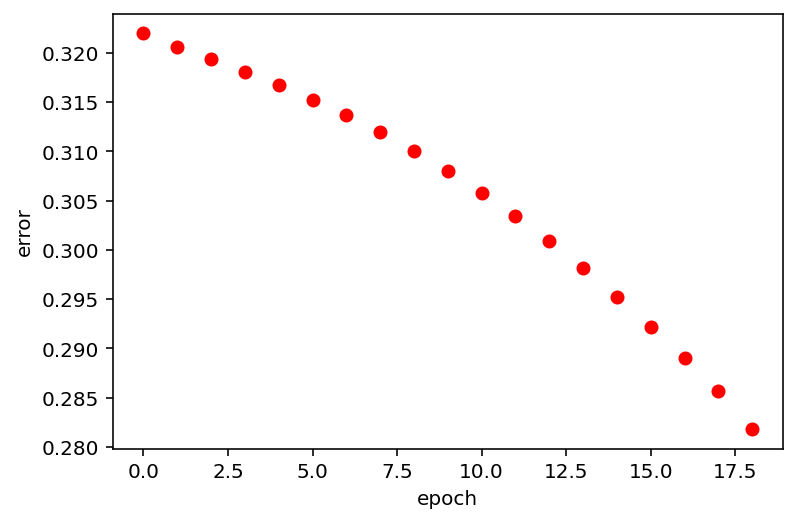

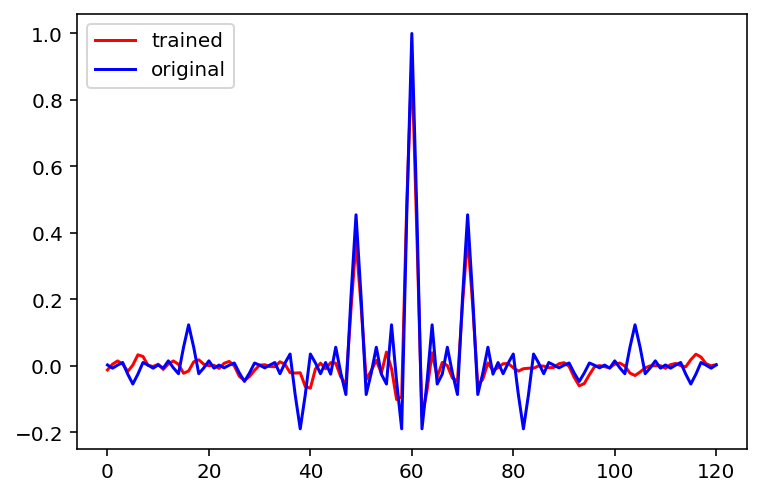

current error:  0.32197133130238204
current error:  0.32064969677854194
current error:  0.31935983596568546
current error:  0.3180964819660658
current error:  0.3167312506083373
current error:  0.31525469705445675
current error:  0.3136564810257317
current error:  0.3119254351798252
current error:  0.3100497693043361
current error:  0.30801749864592604
current error:  0.30581722267254424
current error:  0.30343942051211725
current error:  0.3008784504791307
current error:  0.29813538447434346
current error:  0.2952214986702995
current error:  0.29216105234657724
current error:  0.2889868451562046
current error:  0.2856912569138403
current error:  0.28184647973294136
current error:  0.2755183682690868
current error:  0.2648121266646517
current error:  0.2492502314327335
current error:  0.24715063852056907
current error:  0.23461871094424933
current error:  0.285814517465651
current error:  0.2908273984021317
current error:  0.29417112292179437
current error:  0.34721248707064695
current

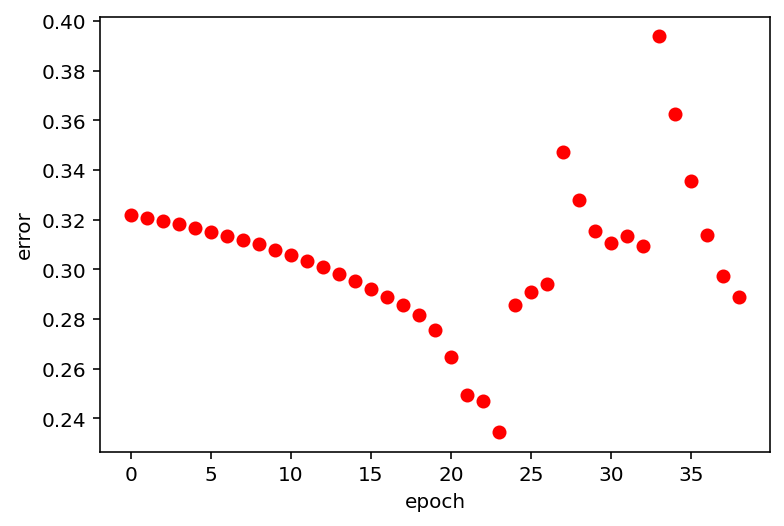

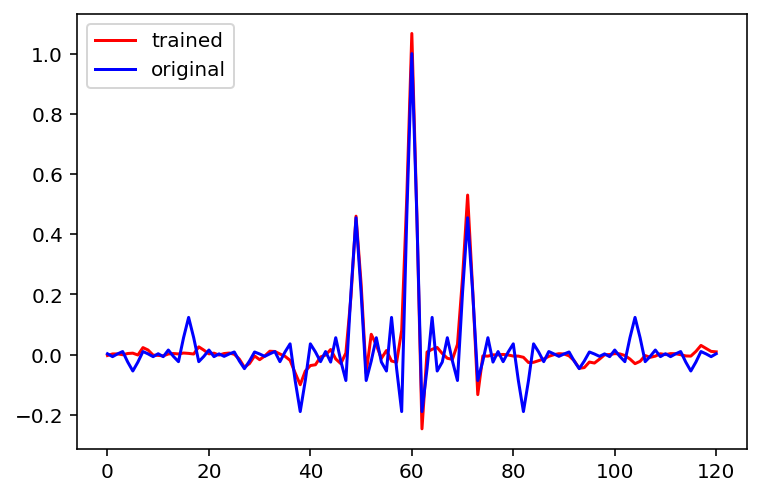

current error:  0.32197133130238204
current error:  0.32064969677854194
current error:  0.31935983596568546
current error:  0.3180964819660658
current error:  0.3167312506083373
current error:  0.31525469705445675
current error:  0.3136564810257317
current error:  0.3119254351798252
current error:  0.3100497693043361
current error:  0.30801749864592604
current error:  0.30581722267254424
current error:  0.30343942051211725
current error:  0.3008784504791307
current error:  0.29813538447434346
current error:  0.2952214986702995
current error:  0.29216105234657724
current error:  0.2889868451562046
current error:  0.2856912569138403
current error:  0.28184647973294136
current error:  0.2755183682690868
current error:  0.2648121266646517
current error:  0.2492502314327335
current error:  0.24715063852056907
current error:  0.23461871094424933
current error:  0.285814517465651
current error:  0.2908273984021317
current error:  0.29417112292179437
current error:  0.34721248707064695
current

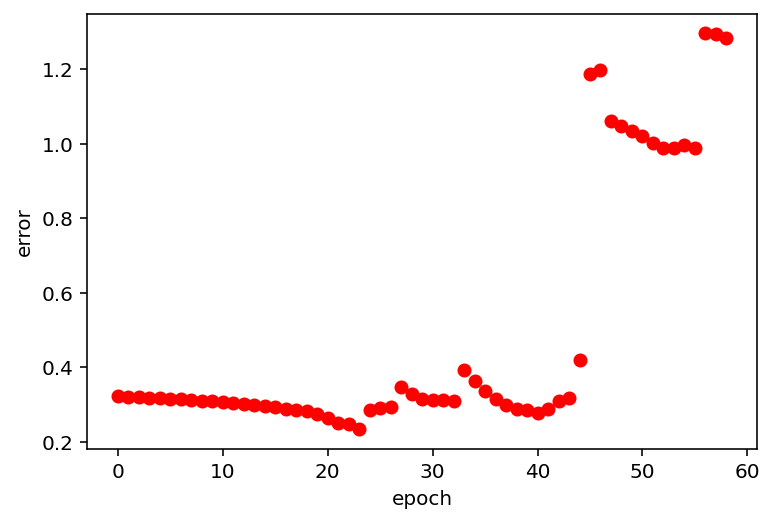

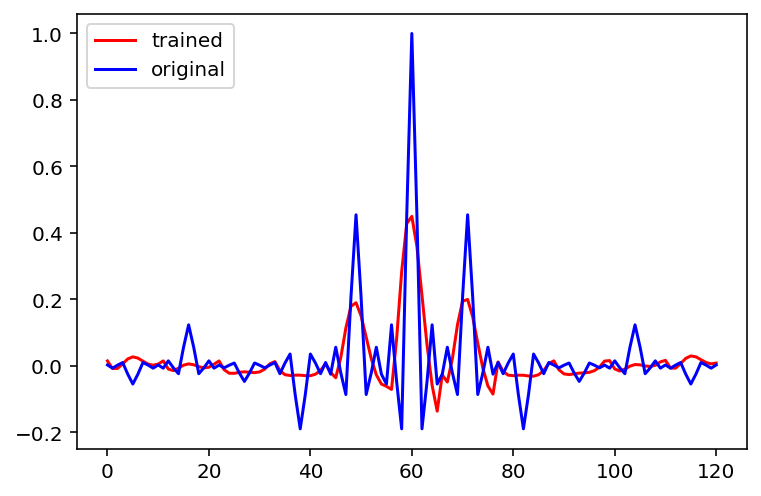

In [14]:
from reco_formes import anfis
from reco_formes.anfis.membership import membershipfunction, mfDerivs
import numpy
from reco_formes.anfis.anfis import ANFIS

# Load a very small dataset with two variables as features and one target

ts = numpy.loadtxt("/content/reco_formes/anfis/trainingSet.txt", usecols=[1,2,3])
X = ts[:,0:2]
Y = ts[:,2]

# Instantiate membership function, each one represents the behavior of one neuron
# In this case we use only gaussian membership function, but it could be triangular,
# bell, trapezoid or sigmoid membership functions as well.

mf = [[['gaussmf',{'mean':0.,'sigma':1.}],
       ['gaussmf',{'mean':-1.,'sigma':2.}],
       ['gaussmf',{'mean':-4.,'sigma':10.}],
       ['gaussmf',{'mean':-7.,'sigma':7.}]],
      
       [['gaussmf',{'mean':1.,'sigma':2.}],
        ['gaussmf',{'mean':2.,'sigma':3.}],
        ['gaussmf',{'mean':-2.,'sigma':10.}],
        ['gaussmf',{'mean':-10.5,'sigma':5.}]]]

epochs = [20, 40, 60]

for i, epoch in enumerate(epochs):
  mfc = membershipfunction.MemFuncs(mf)
  anf = ANFIS(X, Y, mfc)
  anf.trainHybridJangOffLine(epochs=epoch)
  print(round(anf.consequents[-1][0],6))
  print(round(anf.consequents[-2][0],6))
  print(round(anf.fittedValues[9][0],6))

  if round(anf.consequents[-1][0],6) == -5.275538 and round(anf.consequents[-2][0],6) == -1.990703 and round(anf.fittedValues[9][0],6) == 0.002249:
    print('test is good')
    print('--------------------------------------------')
  anf.plotErrors()
  anf.plotResults()

**Commentaries**

Similarly to neural networks, hyperparameters optimization matters for this kind of problem.
The error reaches a minima at the 23th epoch and then it starts increasing again, likely due to overtraining especially on a small dataset with few features. 

It could be interesting to use this network on a massive dataset of historical prices of stock market as proposed in [3] or in [4] and compare the results with those predicted by a LSTM.

Moreover, other fuzzy-neurons types should be tested with different membership functions, like bells, trapezoidals,sigmoids or traingular membership functions. 

Quick and efficient hyperparameters optimization is a subdomain of deep-learning in itself. As a consequence, various Neural Architecture Search (NAS) architectures, aiming to automate the design of neural networks have been proposed and frameworks are available, like nni, designed by microsoft which proposes a lot of NAS algorithms that can be tried on neural nets based on keras, tensorflow or pytorch. https://github.com/microsoft/nni 

In addition, IEEE is dedicating a special issue on about this field in *Evolutionnary Neural Architecture Search and Applications*. https://cis.ieee.org/images/files/Documents/call-for-papers/cim/CIM_SI_ENAS_CFP.pdf 
 
Papers have already been submitted and are being reviewed, so it seems to us that it is important to closely follow those advances as it really helps saving times on parameters optimoization. 

However these kinds of frameworks and researches does not seem to exist or being adapted to fuzzy neural networks, so research and designing pratical libraries on those subjects should be done.

[3] Soto J, Melin P, Castillo O (2015) *Optimization of the type-1 and interval type-2 fuzzy integrators in Ensembles of ANFIS models for prediction of the Dow Jones time series*. In: IEEE SSCI 2014 - 2014 IEEE symposium series on computational intelligence - CIDM 2014: 2014 IEEE symposium on computational intelligence and data mining, proceedings, pp 186–193

[4] Soto J, Melin P, Castillo O (2015) *Time series prediction using ensembles of ANFIS models with particle swarm optimization of the fuzzy integrators*, vol 9413.

